<a href="https://colab.research.google.com/github/Thornary/PythonTSM/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [12]:
# install mplfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Check files on disk
* Go to https://www.kaggle.com/datasets/adhoppin/financial-data?resource=download and download the data.
* Extract the data in your folder, or updload it on Google Colab.
    * You can directly upload a 'zip' file on Google Drive.
    * Then, you'll have to mount google drive, find the correct folder and unzip the file
    * You can achieve this by  adapting the following code

In [3]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')
!ls


Mounted at /content/drive
drive  sample_data


In [4]:
!unzip drive/MyDrive/archive.zip

Archive:  drive/MyDrive/archive.zip
  inflating: Financial Data/cryptocurrencies/ADA-USD.csv  
  inflating: Financial Data/cryptocurrencies/BCH-USD.csv  
  inflating: Financial Data/cryptocurrencies/BTC-USD.csv  
  inflating: Financial Data/cryptocurrencies/ETH-USD.csv  
  inflating: Financial Data/cryptocurrencies/LTC-USD.csv  
  inflating: Financial Data/cryptocurrencies/XRP-USD.csv  
  inflating: Financial Data/currencies/AUD.csv  
  inflating: Financial Data/currencies/CAD.csv  
  inflating: Financial Data/currencies/EUR.csv  
  inflating: Financial Data/currencies/GBP.csv  
  inflating: Financial Data/currencies/INR.csv  
  inflating: Financial Data/currencies/JPY.csv  
  inflating: Financial Data/stocks/AAPL.csv  
  inflating: Financial Data/stocks/ADBE.csv  
  inflating: Financial Data/stocks/AMD.csv  
  inflating: Financial Data/stocks/AMGN.csv  
  inflating: Financial Data/stocks/AMZN.csv  
  inflating: Financial Data/stocks/CMCSA.csv  
  inflating: Financial Data/stocks/CSCO.

In [5]:
import os
dirpath='./Financial Data/stocks'
for dirname, _, filenames in os.walk(dirpath): # for each directory in current folder (./)+path
    for filename in filenames: # for each file in a directory
        print(os.path.join(dirname, filename)) # print the directory/filename

./Financial Data/stocks/SBUX.csv
./Financial Data/stocks/TSLA.csv
./Financial Data/stocks/PYPL.csv
./Financial Data/stocks/QCOM.csv
./Financial Data/stocks/AAPL.csv
./Financial Data/stocks/ADBE.csv
./Financial Data/stocks/INTC.csv
./Financial Data/stocks/MSFT.csv
./Financial Data/stocks/NVDA.csv
./Financial Data/stocks/GOOGL.csv
./Financial Data/stocks/PEP.csv
./Financial Data/stocks/GOOG.csv
./Financial Data/stocks/AMGN.csv
./Financial Data/stocks/NFLX.csv
./Financial Data/stocks/AMZN.csv
./Financial Data/stocks/GILD.csv
./Financial Data/stocks/META.csv
./Financial Data/stocks/AMD.csv
./Financial Data/stocks/CMCSA.csv
./Financial Data/stocks/CSCO.csv


# Open a file as a pandas dataframe

Pandas is very well documented, check here for a complete User Guide :

https://pandas.pydata.org/docs/user_guide/index.html

* Choose one stock file and open it as a DataFrame using the method pd.read_csv(filepath)

In [42]:
df=pd.read_csv('Financial Data/stocks/META.csv')
print (df)

            Date        Open        High         Low       Close     Volume  \
0     2012-05-18   42.049999   45.000000   38.000000   38.230000  573576400   
1     2012-05-21   36.529999   36.660000   33.000000   34.029999  168192700   
2     2012-05-22   32.610001   33.590000   30.940001   31.000000  101786600   
3     2012-05-23   31.370001   32.500000   31.360001   32.000000   73600000   
4     2012-05-24   32.950001   33.209999   31.770000   33.029999   50237200   
...          ...         ...         ...         ...         ...        ...   
2778  2023-06-05  270.299988  275.570007  269.559998  271.390015   20742900   
2779  2023-06-06  270.140015  276.570007  269.690002  271.119995   19419000   
2780  2023-06-07  271.670013  274.250000  262.799988  263.600006   26163600   
2781  2023-06-08  260.619995  267.649994  258.880005  264.579987   20899400   
2782  2023-06-09  262.480011  267.950012  261.700012  264.950012   16938500   

     Symbol  YTD Gains  
0      META   0.000000  
1

# Set up the Dataframe

* convert values in the 'Date' column using pd.to_datetime(dfcolumn)
* set the date as index using df.set_index(column, inplace = True)
* check the first few lines of the dataframe using head()
* what happens if you type 'print(df[(df.index.day==1) & (df.index.month==9)]). Why ?

In [43]:
df['Date'] = pd.to_datetime(df['Date'])


In [44]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume,Symbol,YTD Gains
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,META,0.000000
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,META,-0.109861
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,META,-0.189118
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,META,-0.162961
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,META,-0.136019


In [45]:
print(df[(df.index.day==1) & (df.index.month==9)])

                  Open        High         Low       Close    Volume Symbol  \
Date                                                                          
2015-09-01   86.849998   89.389999   86.500000   87.230003  36097400   META   
2016-09-01  126.379997  126.629997  125.599998  126.169998  13536100   META   
2017-09-01  172.399994  172.919998  171.309998  172.020004  11677600   META   
2020-09-01  294.709991  301.489990  292.709991  295.440002  17295900   META   
2021-09-01  379.589996  384.329987  378.809998  382.049988  11567200   META   
2022-09-01  163.580002  167.360001  160.350006  165.360001  30145700   META   

            YTD Gains  
Date                   
2015-09-01   1.281716  
2016-09-01   2.300288  
2017-09-01   3.499608  
2020-09-01   6.727962  
2021-09-01   8.993460  
2022-09-01   3.325399  


# Plot the closing price
You will start using PyPlot here, the most wellknown plotting library for Python.

Have a look here for a few examples :

https://matplotlib.org/stable/tutorials/pyplot.html

* Use df.plot(y = ..., use_index = True) to visualize the closing price
* Use 'plt' and 'sns' functions to improve your figure
    * Define a size for the figure with plt.figure(figsize = (w,h)), unit is inches (typically (12,8))
    * Use df.plot(y = ..., use_index = True) to visualize the closing price
    * set a title with plt.title
    * set labels with plt.xlabel and plt.ylabel
    * set a sns style with sns.set_style(...), options are 'white', 'whitegrid', 'dark', 'darkgrid'
    * show the plot with plt.show()

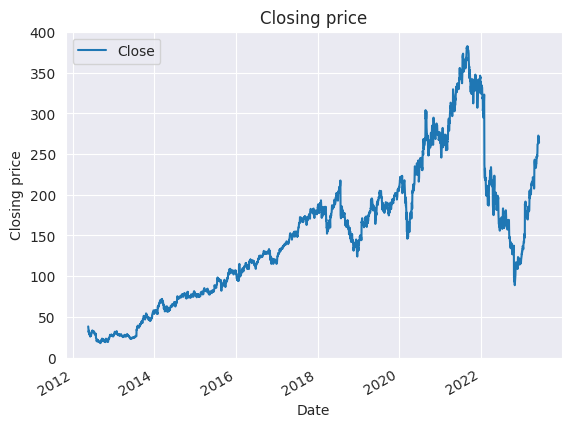

In [53]:
df.plot(y='Close',use_index=True)
plt.title('Closing price')
plt.xlabel ('Date')
plt.ylabel ('Closing price')
sns.set_style('darkgrid')
plt.show()

# Daily returns
* Let's add a column to our dataset with daily returns
    * For that, you can apply the function pct_change() to the 'Close' column
    * Check the result using df.head()

# Plotting daily returns

You will use Seaborn for that plot. Seaborn is a high-level and quite intuitive library.

Check the following link for several plot examples :

https://seaborn.pydata.org/tutorial/introduction.html

* Plot the histogram of daily returns in order to check the distribution
    * This can be done using sns.histplot(..., bins=..., kde=[True/False]). You can vary the bins number and try with or without kde.
    * Don't forget that the first value is a NaN (not a number), you can discard it using df['Your_column'].dropna()
    * You can remove axis if it looks more beautiful to you using sns.despine(left = True). This will remove the top, right (default) and left axis.

# Candlestick charts
Matplotlib also contains a library specialized for Finance, called mplfinance

Have a look here for a list of tutorials :

https://github.com/matplotlib/mplfinance#tutorials

* A bit of preprocessing is needed on the dataframe
    * First, filter the dataframe to only keep data from 2022 or after. In other words, you want all the rows for which df.index.year>2021. Store that in a new dataframe.
    * Then, compute a monthly mean by applying the functions resample(...) and mean() to your new dataframe. Again, store that in a new dataframe.
* Visualize the candlestick plot with mplfinance
    * Import the correct library (mplfinance, usually loaded as mpf)
    * Plot using mpf.plot(..., type = 'candle', style = '...', volume = [True|False])
    * Try different styles, different options and see the impact on the figure